# Exploratory Data Analysis of bank customer churn

The dataset used below is from Kaggle and is of a bank's customer churn records (https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn). As the webpage says, 'it is advantageous for banks to know what leads a client towards the decision to leave the company' and that 'it is much more expensive to sign in a new client than keeping an existing one'. So by knowing what features to look for in predicting if a customer will leave the bank or not, the bank can then attempt retention campaigns and other schemes to ensure their customers stay with the bank.

## Import packages

The three code sections below 1. import the necessary packages, 2. read in the csv file that contains the bank's data and 3. looks at the data types of our features that we will be working with

In [797]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [798]:
df = pd.read_csv('../data/Customer-Churn-Records.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [799]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

From the above inspection of the bank's dataset we can see that there are 17 features or columns to this dataset. There are 10,000 entries or rows and there are no missing values to this dataset.

In [800]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


## Deeper look at features

### Categorical Features

Certain features that are present will not make much difference in determining the liklihood of a customer exiting the bank or not. The features 'RowNumber', 'CustomerId', and 'Surname' will be dropped from the dataset. Looking at the dataset below, we can see that it now starts with 'CreditScore'.

In [801]:
df.drop(['CustomerId', 'RowNumber', 'Surname'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


The target variable 'Exited' is the feature that we are trying to predict or in other words - is this customer likely to churn (1) or not (0). As we can see below, strictly looking at the 'Exited' column, there is nearly 4x more people who did not exit than there are who did. 

In [802]:
exited = df['Exited'].value_counts(normalize=True)
exited


Exited
0    0.7962
1    0.2038
Name: proportion, dtype: float64

In [803]:
### Function to plot category features

def groupy_categorical_features(df, feature_group_by, feature_to_count, ):
    '''
    df = pandas DataFrame
    feature_group_by = a string type feature of the DataFrame to groupby
    feature_to_count = a string type feature of the DataFrame to count
    '''
    new_df = df.groupby(feature_group_by)[feature_to_count].agg(Count='value_counts')
    print(new_df)
    print()

    sns.barplot(data=new_df, x=feature_group_by, y='Count', hue=feature_to_count)
    plt.title(f"Total count of '{feature_to_count}' grouped by '{feature_group_by}'", loc='center')
    plt.show()

### Geography

Looking at the 'Exited' feature grouped by the country variable we see the same pattern as before: a roughly 5x more likelihood of not exiting than exiting when it comes to people from France and Spain and a more than 2x more liklihood of not exiting when it comes to people from Germany. 

                  Count
Geography Exited       
France    0        4203
          1         811
Germany   0        1695
          1         814
Spain     0        2064
          1         413



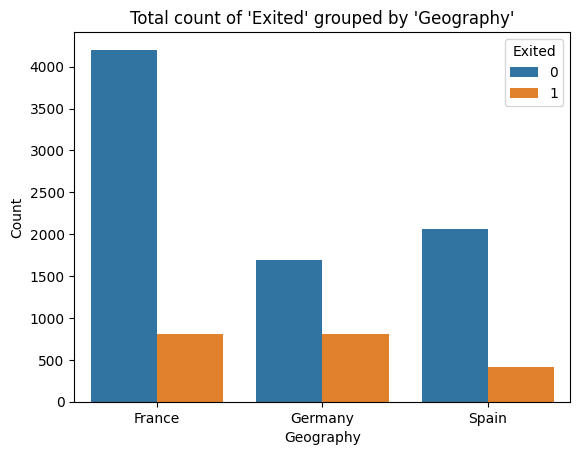

In [804]:
groupy_categorical_features(df=df, feature_group_by='Geography', feature_to_count='Exited')

### Gender

Looking at the 'Exited' column grouped by 'Gender' we see a slightly more than 3x more liklihood of women not exiting compared to other women who did exit and we see a 5x more liklihood of men not exiting compared to other men. 

               Count
Gender Exited       
Female 0        3404
       1        1139
Male   0        4558
       1         899



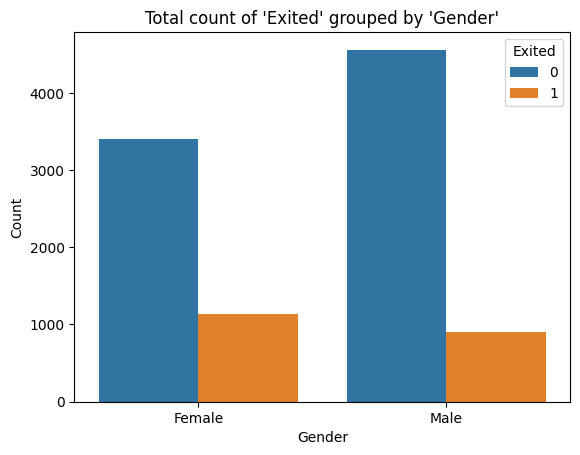

In [805]:
groupy_categorical_features(df=df, feature_group_by='Gender', feature_to_count='Exited')

### Card Type

Looking at customers who have exited based on their Card Type we can see that there is hardly any difference between the different card types and their liklihood to exit or not - between over 4x and under 4x less likely to not exit than exiting.

                  Count
Card Type Exited       
DIAMOND   0        1961
          1         546
GOLD      0        2020
          1         482
PLATINUM  0        1987
          1         508
SILVER    0        1994
          1         502



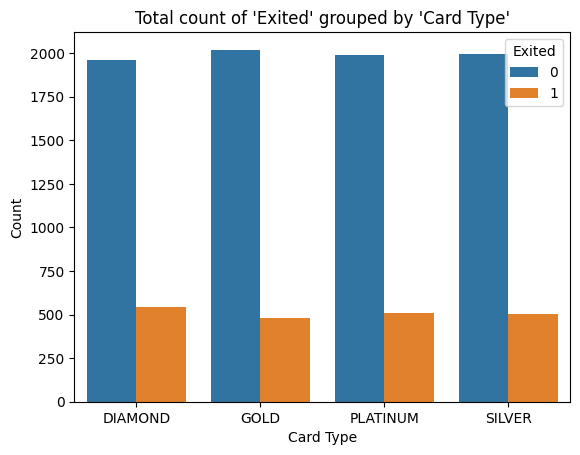

In [806]:
groupy_categorical_features(df=df, feature_group_by='Card Type', feature_to_count='Exited')

### Numerical Features

In [807]:
numerical = df.select_dtypes(exclude=['object', 'category'])
numerical.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Point Earned'],
      dtype='object')

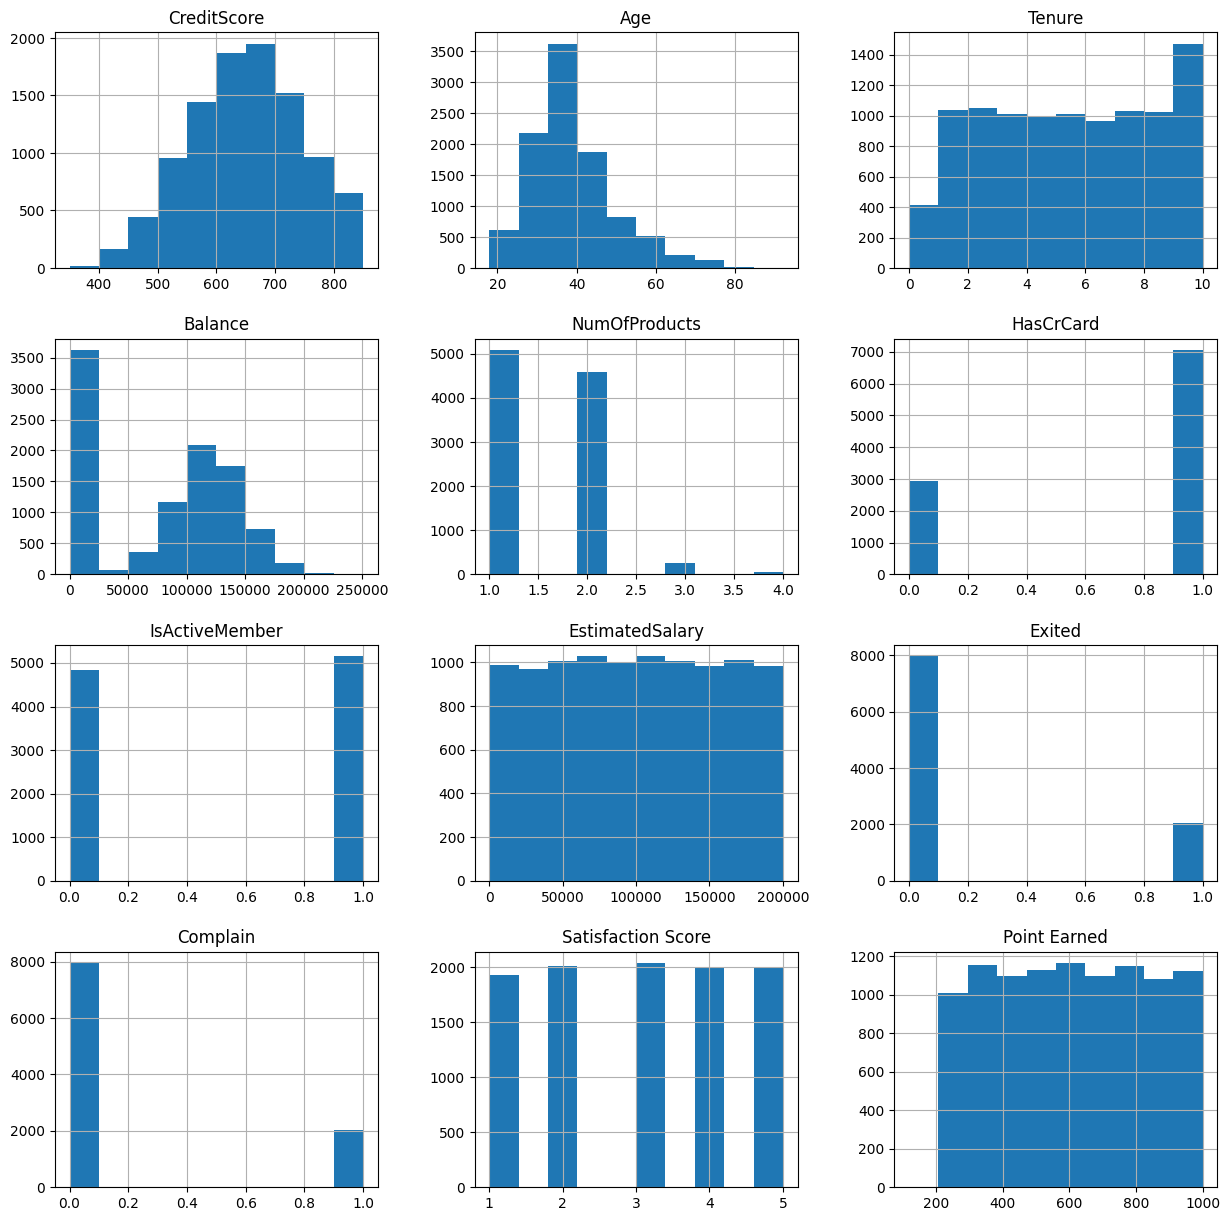

In [808]:
df.hist(figsize=(15,15))
plt.show()

* The above plot of the numerical features of our dataset show a fairly even distribution of 'CreditScore' and 'Age'. Most of the dataset comprises people who have tenure between 2 and 8 years. 
* There is a normal distribution of 'Balance' (other than the fact that there are over 3500 people who have a zero account balance with the bank). 
* Most of the people have 1 or 2 products, over 70% have credit cards, and there is an equal amount of people who say they are active members and those who say they are not. 
* The 'EstimatedSalary' feature shows an equal amount of salaries ranging from $0 up to $200,000 and 'Satisfaction Score' and 'Point Earned' roughly share the same amount of representation of their respective categories.
* Looking at the target feature 'Exited' we can see there is an unequal amount of people who have exited (~20%) than those who stayed (~80%). 
* An interesting thing to note is that the 'Compain' feature also shares the same amount of representation that the 'Exited' feature showed; ~80% did not issue a complaint and ~20% did.

## Correlations

<Axes: >

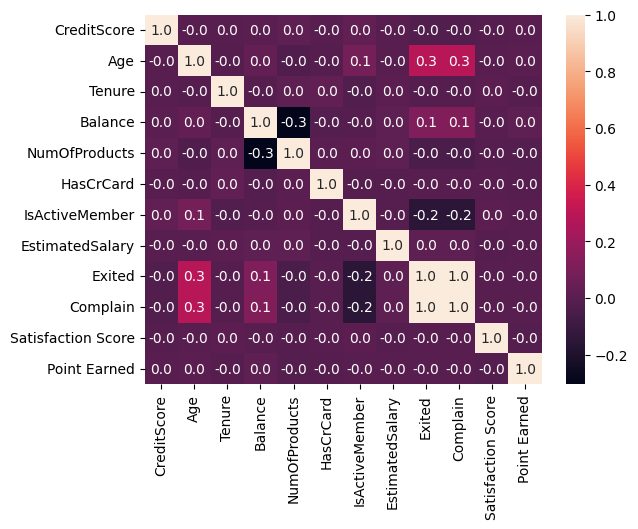

In [809]:
sns.heatmap(data=numerical.corr(), fmt='.1f', annot=True)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


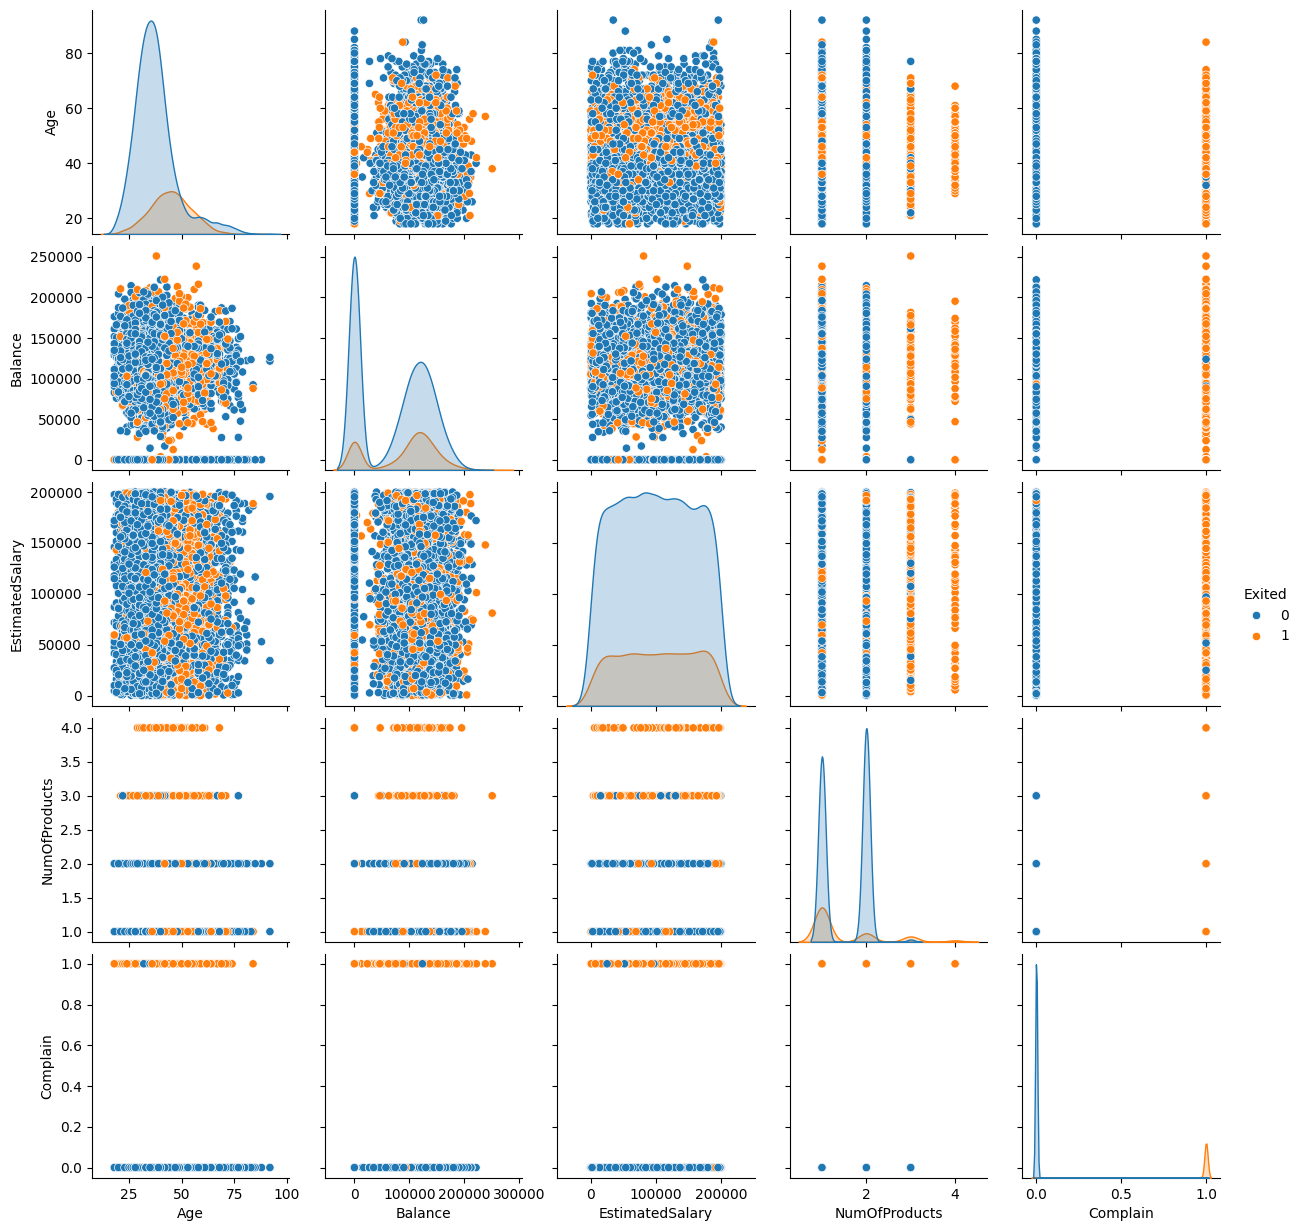

In [810]:
sns.pairplot(data=df, hue='Exited', vars=['Age', 'Balance', 'EstimatedSalary', 'NumOfProducts', 'Complain'])
# plt.title("Reduced plot by 'Exited' feature", loc='center')
plt.show()

                 Count
Complain Exited       
0        0        7952
         1           4
1        1        2034
         0          10



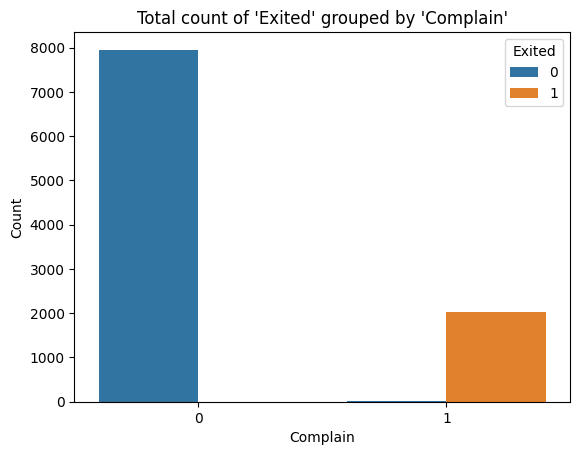

In [811]:
groupy_categorical_features(df=df, feature_group_by='Complain', feature_to_count='Exited')

The above heatmap shows the correlations between the different features in our dataset. The target variable that we are looking at, 'Exited', shows to have a very weak positive correlation between 'Balance' and 'Exited', a weak positive correlation between 'Age' and 'Exited', and nearly a 100% positive correlation between 'Complain' and 'Exited'. 
The graph above shows that correlation.

- The middle pairplot shows an interesting pattern of people around the age of 50 with 3 or more products more likely to exit the bank.

## Finalizing dataframe

In [812]:

df = df.select_dtypes(exclude=['category'])

dummy_df = pd.get_dummies(data=df)

for col in dummy_df.columns:
    if dummy_df[col].dtype == 'bool':
        dummy_df[col] = dummy_df[col].astype('int32')

dummy_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,...,464,1,0,0,1,0,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,...,456,0,0,1,1,0,1,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,...,377,1,0,0,1,0,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,...,350,1,0,0,1,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,...,425,0,0,1,1,0,0,1,0,0


In [813]:
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Tenure              10000 non-null  int64  
 3   Balance             10000 non-null  float64
 4   NumOfProducts       10000 non-null  int64  
 5   HasCrCard           10000 non-null  int64  
 6   IsActiveMember      10000 non-null  int64  
 7   EstimatedSalary     10000 non-null  float64
 8   Exited              10000 non-null  int64  
 9   Complain            10000 non-null  int64  
 10  Satisfaction Score  10000 non-null  int64  
 11  Point Earned        10000 non-null  int64  
 12  Geography_France    10000 non-null  int32  
 13  Geography_Germany   10000 non-null  int32  
 14  Geography_Spain     10000 non-null  int32  
 15  Gender_Female       10000 non-null  int32  
 16  Gende

* The dataframe has been encoded to ensure that the categorical features are able to be used in the machine learning process

* Since the target feature is not normally distributed techniques will be used such as SMOTE to test for differences in the results

